# Рабочая тетрадь № 7

### 1.1.1 Пример
Рассмотрим программу обучения персептрона на языке Python. Сначала
рассмотрим основной класс персептрона, который умеет учиться по
тестовым данным.

In [10]:
# Класс, который реализует персептрон и его обучение
class Perceptron:
    def __init__(self, N):
        # Создать нулевые веса
        self.w = list()
        for i in range(N):
            self.w.append(0)
    
    # Метод для вычисления значения персептрона
    def calc(self, x):
        res = 0
        for i in range(len(self.w)):
            res = res + self.w[i] * x[i]
        return res
    
    # Пороговая функция активации персептрона
    def sign(self, x):
        if self.calc(x) > 0:
            return 1
        else:
            return -1
        
    # Обучение на одном примере
    def learn(self, la, x, y):
        # Обучаем только в том случае, когда результат неверный
        if y * self.calc(x) <= 0:
            for i in range(len(self.w)):
                self.w[i] = self.w[i] + la * y * x[i]
    
    # Обучкение по всем данным T - кортеж примеров
    def learning(self, la, T):
        # Цикл обучения
        for n in range(100):
            # Обучение по всему набору примеров
            for t in T:
                self.learn(la, t[0], t[1])
                
perceptron = Perceptron(2)
la = 0.1 # константа обучения
# Создаем примеры
T = list()
T.append([[2, 1], 1])
T.append([[3, 2], 1])
T.append([[4, 1], 1])
T.append([[1, 2], -1])
T.append([[2, 3], -1])
T.append([[5, 7], -1])
perceptron.learning(la, T) # обучение персептрона
print(perceptron.w) # печатаем веса
# Проверим работу на тестовых примерах
print(perceptron.sign([1.5, 2]))
print(perceptron.sign([3, 1.5]))
print(perceptron.sign([5, 1]))
print(perceptron.sign([5, 10]))
    

[0.1, -0.1]
-1
1
1
-1


### 1.1.2 Пример
Для написания кода нейрона будем использовать библиотеку Pytnon
— NumPy:


In [11]:
import numpy as np
def sigmoid(x):
    # Функция активации: f(1) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # c = 4
n = Neuron(weights, bias)
x = np.array([2, 3])       # x = 2, y = 3
print(n.feedforward(x))    # 0.999

0.9990889488055994


In [12]:
import numpy as np

class OurNeuralNetwork:
    '''
        Данные нейросети:
            - два входа
            - два нейрона в скрытых слоях (h1, h2)
            - выход (o1)
        Нейроны имеют идентичные веса и пороги:
            - w = [0, 1]
            - b = 0
    '''
    
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        return out_o1
        
network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) 

0.7216325609518421


### 1.1.2 Задание
Реализовать классы нейросетей по аналогии с классом OurNeuralNetwork. \
Данные нейросети: 


− три входа (𝑥1, 𝑥2, 𝑥 3); \
− три нейрона в скрытых слоях (ℎ1, ℎ2, ℎ3); \
− выход (𝑜1). \
Нейроны имеют идентичные веса и пороги: \
− 𝑤 = [0.5, 0.5, 0.5] \
− 𝑏 = 0 

In [13]:
import numpy as np

class OurNeuralNetwork:
   
    def __init__(self):
        weights = [0.5, 0.5, 0.5]
        bias = 0
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.h3 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        out_h3 = self.h3.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2, out_h3]))
        return out_o1
        
network = OurNeuralNetwork()
x = np.array([0, 0, 0])
print(network.feedforward(x)) 

0.679178699175393


Данные нейросети: \
− два входа (𝑥1, 𝑥2); \
− два нейрона в скрытых слоях (ℎ1, ℎ2); \
− два выхода (𝑜1, 𝑜2). \
Нейроны имеют идентичные веса и пороги: \
− 𝑤 = [1, 0]; \
− 𝑏 = 1.

In [14]:
import numpy as np

class OurNeuralNetwork:
   
    def __init__(self):
        weights = [1,0]
        bias = 1
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)
    
    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2
        
network = OurNeuralNetwork()
x = np.array([0, 0])
print(network.feedforward(x)) 

(0.8495477739862124, 0.8495477739862124)


### 1.1.3 Задание
Реализуйте классы нейронных сетей с использованием других функций
активации.\
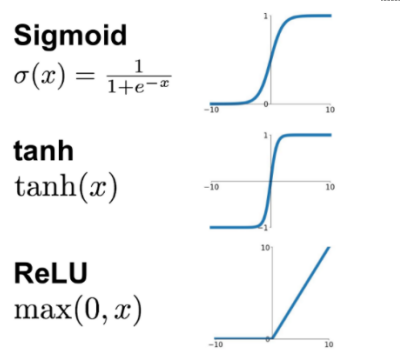

Функция сигмоиды

In [15]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return sigmoid(total)
    
class OurNeuralNetwork:

    def __init__(self):
        weights = [1,0]
        bias = 1
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

Гиперболический тангенс

In [16]:
from math import tanh as th
import numpy as np

def tanh(x):
    return th(x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return tanh(total)
    
class OurNeuralNetwork:

    def __init__(self):
        weights = [1,0]
        bias = 1
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

In [17]:
import numpy as np

def fMax(x):
    return max(0, x)

class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    
    def feedforward(self, inputs):
        total = np.dot(self.weights, inputs) + self.bias
        return fMax(total)
    
class OurNeuralNetwork:

    def __init__(self):
        weights = [1,0]
        bias = 1
        # Класс Neuron из прошлого раздела
        self.h1 = Neuron(weights, bias)
        self.h2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)
        self.o2 = Neuron(weights, bias)

    def feedforward(self, x):
        out_h1 = self.h1.feedforward(x)
        out_h2 = self.h2.feedforward(x)
        # Выход для o1 - это выходы h1 и h2
        out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))
        out_o2 = self.o2.feedforward(np.array([out_h1, out_h2]))
        return out_o1, out_o2

### 1.2.1 Задание
Используйте классы MLPClassified и MLPRegressor для классификации и
регрессии произвольных данных из интернета. Проведите анализ
атрибуты, полученных моделей.
Для классификации можете взять набор данных Ирисов: \
https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f77d537619d0e07d5ae3/iris.csv
а для регрессии датасет зависимости заработной платы от опыта работы: \
https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv

In [18]:
# Загрука библиотек
import pandas as pd
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.model_selection import train_test_split

# Загрузка данных
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
dataframe = pd.read_csv(url)

# Формируем  из двух списков
x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values


# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Обучение модели
mlp_classifier = MLPClassifier(random_state=123)
mlp_classifier.fit(x_train, y_train)

# Формирование прогноза
y_preds = mlp_classifier.predict(x_test)

# Оценка точности моделей классификации
print('MLPClassifier:')
print(y_preds[:10])
print(y_test[:10])
print('Test Accuracy : %.3f' %mlp_classifier.score(x_test, y_test))
print('Training Accuracy : %.3f' %mlp_classifier.score(x_train, y_train))
print('Loss : ', mlp_classifier.loss_)
print('Number of Coefs : ', len(mlp_classifier.coefs_))
print('Number of Intercepts : ', len(mlp_classifier.intercepts_))
print('Number of Iterations for Witch Estimator Ran : ', mlp_classifier.n_iter_)
print('Number of Output Layers Activation Function : ', mlp_classifier.out_activation_)


# Загрузка данных
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataframe = pd.read_csv(url)

# Формируем  из двух списков
x = dataframe.iloc[:, :-1].values
y = dataframe.iloc[:, -1].values

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

# Обучение модели
mlp_regressor = MLPRegressor(random_state=123)
mlp_regressor.fit(x_train, y_train)

# Формирование прогноза
y_preds = mlp_regressor.predict(x_test)

print('\n\n\nMLPRegressor:')
print(y_preds[:10])
print(y_test[:10])
print('Test R^2 Score : %.3f' %mlp_regressor.score(x_test, y_test))
print('Training R^2 Score : %.3f' %mlp_regressor.score(x_train, y_train))
print('Loss : ', mlp_regressor.loss_)
print('Number of Coefs : ', len(mlp_regressor.coefs_))
print('Number of Intercepts : ', len(mlp_regressor.intercepts_))
print('Number of Iterations for Witch Estimator Ran : ', mlp_regressor.n_iter_)
print('Number of Output Layers Activation Function : ', mlp_regressor.out_activation_)


C:\Users\ilyaMedv\.conda\envs\4_AI\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier:
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor']
['Versicolor' 'Virginica' 'Virginica' 'Versicolor' 'Setosa' 'Virginica'
 'Versicolor' 'Setosa' 'Setosa' 'Versicolor']
Test Accuracy : 0.967
Training Accuracy : 0.975
Loss :  0.3012607394074939
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Witch Estimator Ran :  200
Number of Output Layers Activation Function :  softmax



MLPRegressor:
[20.26234628 55.2781752  18.82135812 50.48274487 20.26234628 50.9622879 ]
[ 54445. 121872.  56642. 116969.  64445. 112635.]
Test R^2 Score : -8.796
Training R^2 Score : -8.261
Loss :  2988058032.1601596
Number of Coefs :  2
Number of Intercepts :  2
Number of Iterations for Witch Estimator Ran :  200
Number of Output Layers Activation Function :  identity


C:\Users\ilyaMedv\.conda\envs\4_AI\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
